# Stock Price Prediction Project 

##  the steps taken and methodologies employed in a stock price prediction project. The project aimed to forecast stock prices using machine learning techniques and technical analysis indicators.or.

In [19]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
data = pd.read_excel(r"D:\Minor Project\Minor Project Data set (Stock Price Prediction).xlsx")

In [21]:
data.shape

(1009, 7)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [23]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [24]:
data.describe()

Date         Open         High          Low  \
count                           1009  1009.000000  1009.000000  1009.000000   
mean   2020-02-05 07:30:58.870168320   419.059673   425.320703   412.374044   
min              2018-02-05 00:00:00   233.919998   250.649994   231.229996   
25%              2019-02-06 00:00:00   331.489990   336.299988   326.000000   
50%              2020-02-06 00:00:00   377.769989   383.010010   370.880005   
75%              2021-02-05 00:00:00   509.130005   515.630005   502.529999   
max              2022-02-04 00:00:00   692.349976   700.989990   686.090027   
std                              NaN   108.537532   109.262960   107.555867   

             Close    Adj Close        Volume  
count  1009.000000  1009.000000  1.009000e+03  
mean    419.000733   419.000733  7.570685e+06  
min     233.880005   233.880005  1.144000e+06  
25%     331.619995   331.619995  4.091900e+06  
50%     378.670013   378.670013  5.934500e+06  
75%     509.079987   509.079987  9.322400e+06  
max     691.690002   691.690002  5.890430e+07  
std     108.289999   108.289999  5.465535e+06

In [25]:
data["Date"].unique

<bound method Series.unique of 0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]>

##  I generate a line plot depicting the opening prices of stocks over time. This visualization offers insights into the trends and fluctuations in stock prices throughout the analyzed period.

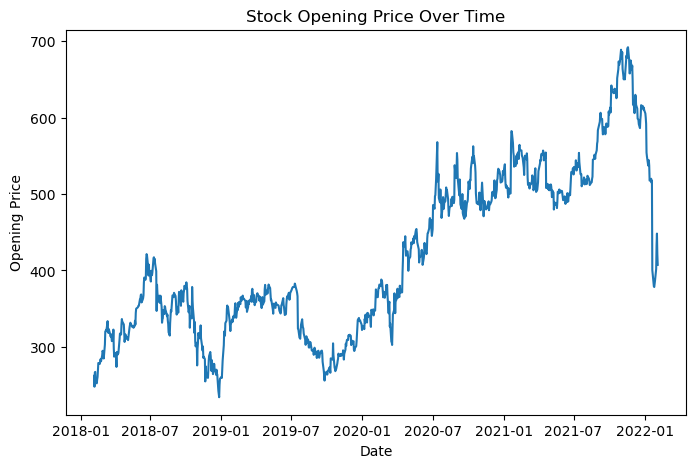

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(data['Date'], data['Open'])
plt.title('Stock Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.show()

In [27]:
data.drop("Adj Close", axis=1, inplace=True)

In [28]:
data["Pre-Close"] = data.loc[:,'Close'].shift(1)
data["Pre-Volume"] = data.loc[:,"Volume"].shift(1)

data['weekdays'] = data['Date'].dt.dayofweek

In [29]:
data.shape

(1009, 9)

In [30]:
data['5-Pre-Close-Mean'] = data["Pre-Close"].rolling(5).mean()
data['10-Pre-Close-Mean'] = data["Pre-Close"].rolling(10).mean()

In [31]:
data.shape

(1009, 11)

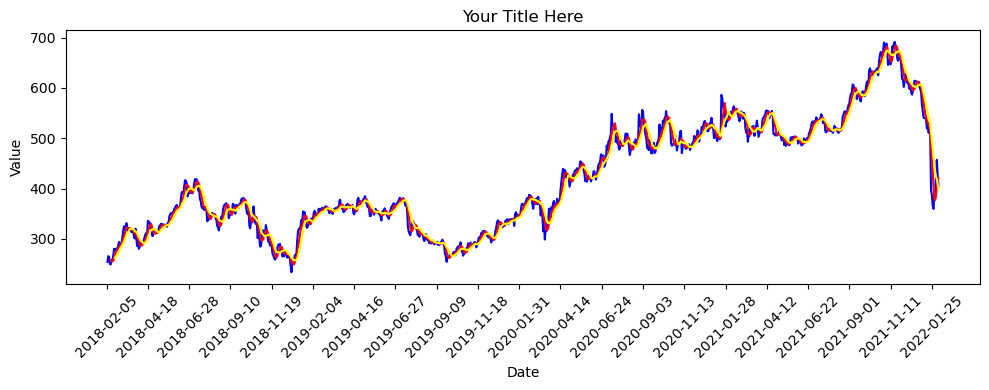

In [32]:
x_data = data.index.values

plt.figure(figsize=(10,4))
plt.plot(x_data, data["Pre-Close"], color='blue')
plt.plot(x_data, data["5-Pre-Close-Mean"], color='red')
plt.plot(x_data, data["10-Pre-Close-Mean"], color='yellow')

date_labels = data['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
plt.xticks(x_data[::50], date_labels[::50], rotation=45) 
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Your Title Here')

plt.tight_layout()
plt.show()

In [33]:
data.shape

(1009, 11)

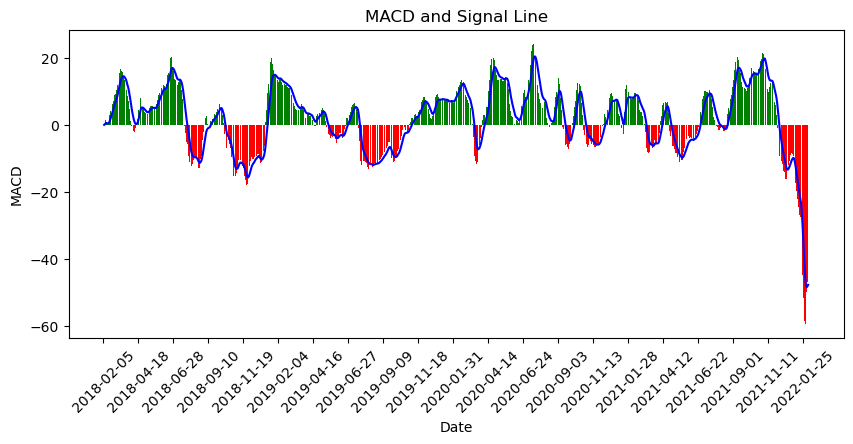

In [34]:
def calc_macd(data, len1, len2, len3):
    shortEMA = data.ewm(span=len1, adjust=False).mean()
    longEMA = data.ewm(span=len2, adjust=False).mean()
    MACD = shortEMA - longEMA
    signal = MACD.ewm(span=len3, adjust=False).mean()
    return MACD, signal

MACD, signal = calc_macd(data["Pre-Close"], 12, 26, 9)

data["MACD"] = MACD
data["MACD_signal"] = signal

plt.figure(figsize=(10,4))
colors = np.array(['green']*len(data["MACD"]))
colors[data['MACD'] < 0] = "red"

x_data = data.index.values

plt.bar(x_data, data['MACD'], color=colors)
plt.plot(x_data, data["MACD_signal"], color="blue")
plt.xlabel('Date')
plt.ylabel('MACD')
date_labels = data['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
plt.xticks(x_data[::50], date_labels[::50], rotation=45) 
plt.title('MACD and Signal Line')
plt.show()

In [35]:
data.shape

(1009, 13)

In [36]:
def calc_rsi(data,period):
  delta = data.diff()
  up = delta.clip(lower=0)
  down = -1*delta.clip(upper=0)
  ema_up = up.ewm(com=period , adjust=False).mean()
  ema_down = down.ewm(com=period , adjust=False).mean()
  rs = ema_up / ema_down
  rsi = 100 - (100/(1+rs))
  return rsi

data["RSI"] = calc_rsi(data["Pre-Close"],13)
data["RSI_Volume"] = calc_rsi(data["Pre-Volume"],13)

In [37]:
data.shape

(1009, 15)

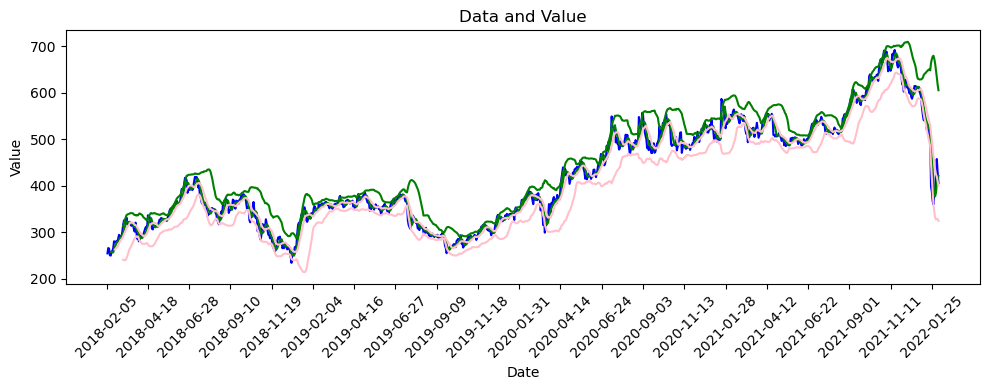

In [38]:
def calc_bollinger(data,period):
  mean = data.rolling(period).mean()
  std = data.rolling(period).std()
  upper_band = np.array(mean) + 2 * np.array(std)
  lower_band = np.array(mean) - 2 * np.array(std)
  return upper_band , lower_band

upper , lower = calc_bollinger(data["Pre-Close"],20)
data["Upper_Band"] = upper
data["Lower_Band"] = lower


plt.figure(figsize=(10,4))
plt.plot(x_data, data["Pre-Close"], color='blue')
plt.plot(x_data, data["5-Pre-Close-Mean"], color='green')
plt.plot(x_data, data["10-Pre-Close-Mean"], color='pink')
plt.plot(x_data, data["Upper_Band"], color='green')
plt.plot(x_data, data["Lower_Band"], color='pink')
date_labels = data['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
plt.xticks(x_data[::50], date_labels[::50], rotation=45) 
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Data and Value')

plt.tight_layout()
plt.show()

In [39]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Pre-Close',
       'Pre-Volume', 'weekdays', '5-Pre-Close-Mean', '10-Pre-Close-Mean',
       'MACD', 'MACD_signal', 'RSI', 'RSI_Volume', 'Upper_Band', 'Lower_Band'],
      dtype='object')

In [40]:
labels = ['Pre-Close',
       'Pre-Volume', 'weekdays', '5-Pre-Close-Mean', '10-Pre-Close-Mean', 'MACD', 'MACD_signal', 'RSI', 'RSI_Volume',
       'Upper_Band', 'Lower_Band']

period = 1
new_label = [str(period)+"d_"+label for label in labels]
data[new_label] = data[labels].pct_change(period , fill_method="ffill")

period = 2
new_label = [str(period)+"d_"+label for label in labels]
data[new_label] = data[labels].pct_change(period , fill_method="ffill")

period = 5
new_label = [str(period)+"d_"+label for label in labels]
data[new_label] = data[labels].pct_change(period , fill_method="ffill")

period = 10
new_label = [str(period)+"d_"+label for label in labels]
data[new_label] = data[labels].pct_change(period , fill_method="ffill")

C:\Users\reehan roshan\AppData\Local\Temp\ipykernel_4452\577464778.py:7: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data[new_label] = data[labels].pct_change(period , fill_method="ffill")
C:\Users\reehan roshan\AppData\Local\Temp\ipykernel_4452\577464778.py:11: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data[new_label] = data[labels].pct_change(period , fill_method="ffill")
C:\Users\reehan roshan\AppData\Local\Temp\ipykernel_4452\577464778.py:15: FutureWarning: The 'fill_method' keyword being not None and the 'li

In [41]:
dataDupli = data

In [42]:
dataDupli.shape

(1009, 61)

In [43]:
import numpy as np

dataDupli = dataDupli.replace(np.inf, np.nan).dropna()


In [44]:
dataDupli.shape

(438, 61)

In [45]:
import pandas as pd


dataDupli['Date'] = pd.to_datetime(dataDupli['Date'])

dataDupli['Year'] = dataDupli['Date'].dt.year
dataDupli['Month'] = dataDupli['Date'].dt.month
dataDupli['Day'] = dataDupli['Date'].dt.day


dataDupli.drop('Date', axis=1, inplace=True)


In [46]:
X = dataDupli.drop(["Close","Volume"],axis=1).values
y = dataDupli["Close"]

In [47]:
X_train , X_test, Y_train, Y_test = train_test_split(X, y , random_state=0)
print(f"X_train - {X_train.shape}, Y_train - {Y_train.shape} , X_test - {X_test.shape}, Y_test - {Y_test.shape}")

X_train - (328, 61), Y_train - (328,) , X_test - (110, 61), Y_test - (110,)


In [48]:
lineanRegression_model = LinearRegression()
lineanRegression_model.fit(X_train, Y_train)

LinearRegression()

In [49]:
lineanRegression_prediction = lineanRegression_model.predict(X_test)

In [50]:
lineanRegression_model_Outcome = pd.DataFrame({"Actual-Price": Y_test.values.ravel(), "prediction": lineanRegression_prediction})

In [51]:
lineanRegression_model_Outcome

Actual-Price  prediction
0      347.739990  347.330170
1      509.000000  507.819705
2      419.600006  414.866212
3      565.169983  564.341072
4      368.149994  374.389007
..            ...         ...
105    317.380005  306.483022
106    530.760010  531.598770
107    353.540009  351.791778
108    369.209991  371.021109
109    514.729980  502.703132

[110 rows x 2 columns]

In [53]:
lineanRegression_model_Outcome.to_csv(r"D:\Minor Project\predicted_price.csv")

In [54]:
print(f"lineanRegression_model - Score = {lineanRegression_model.score(X_test, Y_test)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, lineanRegression_prediction)}")
print(f"Root Mean Squared Error: {math.sqrt(mean_squared_error(Y_test, lineanRegression_prediction))}")

lineanRegression_model - Score = 0.9973990342757554
Mean Absolute Error: 3.855423441210745
Root Mean Squared Error: 5.294705625179074


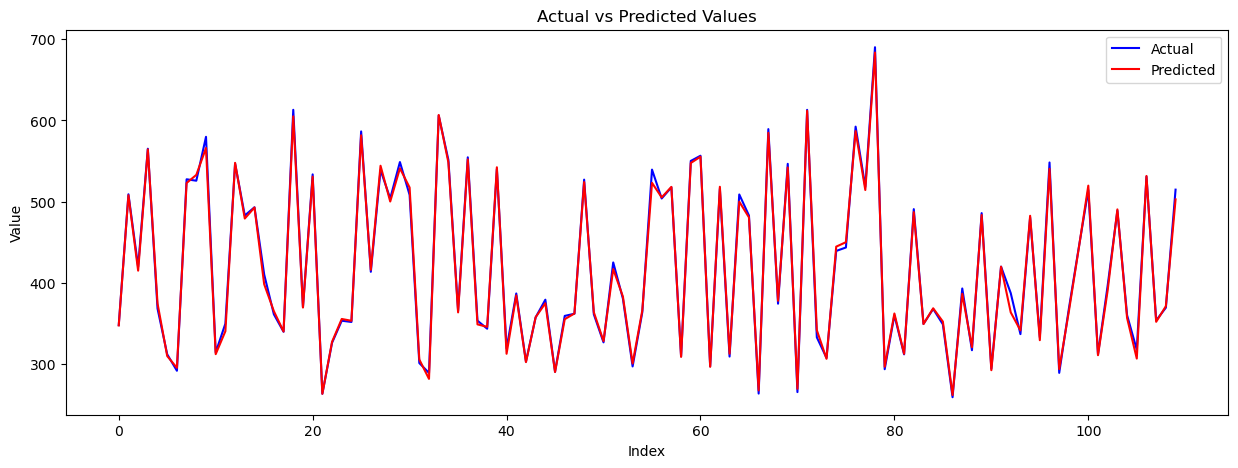

In [55]:
plt.figure(figsize=(15, 5))
plt.plot(range(len(Y_test)), Y_test, "blue", label="Actual")
plt.plot(range(len(lineanRegression_prediction)), lineanRegression_prediction, "red", label="Predicted")
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()